In [14]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
import numpy as np

import pandas as pd
import sys
import getpass
from functions import *
np.set_printoptions(precision=2)
pd.set_option('precision', 2)

## Reading in dataframe
and fixing students that don't behave properly
and anonymizing data to save as csv

In [15]:
df = pd.read_csv('C:\Users\\'+getpass.getuser()+'\\Google Drive\Jonathan Sarah Ido folder\data\CCK\MATCHING_phet_cck_user_actions+sophistication_WITHPAUSE_anonymized.txt')
df_scores = pd.read_csv('C:\Users\\'+getpass.getuser()+'\\Google Drive\Jonathan Sarah Ido folder\data\CCK\MATCHING_phet_cck_user_data_anonymized.txt')
df["student"] = df["student"].astype('category')
df_scores["student"] = df_scores["student"].astype('category')
df["Family"]=df["Family"].str.capitalize()

## Getting a sense of the data

In [16]:
df2 = df[df['Activity']=="a2"]
print "The following are the possible actions grouped by family:\n"
actionTypes = {}
for family in set(df2['Family']):
    actionTypes[family] = list(set(df2[df2['Family']==family]['Action']))
    print '{0}:\t {1}'.format(family,', '.join(list(set(df2[df2['Family']==family]['Action']))))

The following are the possible actions grouped by family:

Reset:	 reset
Pause:	 pause
Extra:	 moreVoltsOption, join, remove, changeResistance, sliderEndDrag, add, organizeWorkspace, joinX
Test:	 startMeasure, playPause, traceMeasure, endMeasure
Organize:	 organizeWorkspace
Build:	 join, reverse, switch, changeResistance, sliderEndDrag, add, changeVoltage, joinX
Interface:	 deiconified, help, iconified, exitSim, enableComponent, disableComponent, view
Revise:	 join, reverse, switch, remove, changeResistance, sliderEndDrag, add, split, changeVoltage, joinX


In [17]:
df2 = df[df['Activity']=="a2"]
print "The following are the possible outcomes grouped by family:\n"
outcomeTypes = {}
for family in set(df2['Family']):
    outcomeTypes[family] = list(set(df2[df2['Family']==family]['Outcome']))
    print '{0}:\t {1}'.format(family,', '.join(list(set(df2[df2['Family']==family]['Outcome']))))

The following are the possible outcomes grouped by family:

Reset:	 None
Pause:	 pause
Extra:	 current_change, None, reading_updated, fire_started, light_intensity
Test:	 current_change, None, fire_started, reading_updated, light_intensity, deliberate_measure
Organize:	 None
Build:	 None
Interface:	 None
Revise:	 current_change, fire_started, reading_updated, None, light_intensity


### Recategorizing

Let's recategorize the actions to 1) add more context to action families, 2) build categorizies with more granularity

* Explicit testing with voltmeter
* Explicit testing with ammeter
* Explicit testing with series ammeter
* Constructing with Implicit feedback from testing instrument (connected and value changed)
* Constructing with implicit feedback from other source (current change, fire started, light intensity
* Constructing without any implicit feedback (ie. add wire)
* Pause - long (probably writing things down and planning, or reflecting and planning, or reflecting and writing down etc)
* Pause -short (short reflection, planning or writing down)
* Other changes to categories
* Ignore “organize” actions and interface actions (as previously done)
* Ignore reset actions? Maybe look at what students do after they reset?
* Recategorize "extra" actions either using the construction actions bove











In [35]:
def remodel_families(row):
    family = row["Family"]
    component = row["Component"]
    outcome = row["Outcome"]
    action = row["Action"]
    
    if family == "Test":
        if outcome == "deliberate_measure":
            return "TestExplicit-"+component
        elif outcome != "None":
            return "TestImplicit"
        #Assume if outcome is none, then they just moved the instrument?
        #What does it mean when testing with series Ammeter and light intensity changes?
    
    elif family == "Build" or family == "Revise" or family == "Extra":
        if action == "organizeWorkspace":
            return "Organize"
        if outcome == "None":
            return "ConstructWithoutFeedback"
        elif outcome == "reading_updated":
            return "ConstructWithFeedbackTestingInstrument"
        else:
            return "ConstructWithFeedbackOther"
    else:
        return family
    
newdf = df2.copy()
newdf['Family'] = df2.apply (lambda row: remodel_families (row),axis=1)

In [36]:
print "The following are the possible actions grouped by family:\n"
actionTypes = {}
for family in set(newdf['Family']):
    actionTypes[family] = list(set(newdf[newdf['Family']==family]['Action']))
    print '{0}:\t {1}'.format(family,', '.join(list(set(newdf[newdf['Family']==family]['Action']))))

The following are the possible actions grouped by family:

Reset:	 reset
TestExplicit-voltmeter:	 startMeasure
Pause:	 pause
TestExplicit-nonContactAmmeter:	 startMeasure, traceMeasure
ConstructWithFeedbackOther:	 moreVoltsOption, join, reverse, switch, remove, changeResistance, sliderEndDrag, add, split, changeVoltage, joinX
TestExplicit-playPause:	 playPause
TestExplicit-seriesAmmeter:	 startMeasure
ConstructWithoutFeedback:	 moreVoltsOption, join, reverse, switch, remove, changeResistance, sliderEndDrag, add, split, changeVoltage, joinX
Organize:	 organizeWorkspace
TestImplicit:	 startMeasure, traceMeasure, playPause, endMeasure
Interface:	 deiconified, help, iconified, exitSim, enableComponent, disableComponent, view
None:	 
ConstructWithFeedbackTestingInstrument:	 join, reverse, remove, changeResistance, sliderEndDrag, switch, split, changeVoltage, joinX


In [37]:
print "The following are the possible outcomes grouped by family:\n"
outcomeTypes = {}
for family in set(newdf['Family']):
    outcomeTypes[family] = list(set(newdf[newdf['Family']==family]['Outcome']))
    print '{0}:\t {1}'.format(family,', '.join(list(set(newdf[newdf['Family']==family]['Outcome']))))

The following are the possible outcomes grouped by family:

Reset:	 None
TestExplicit-voltmeter:	 deliberate_measure
Pause:	 pause
TestExplicit-nonContactAmmeter:	 deliberate_measure
ConstructWithFeedbackOther:	 current_change, fire_started, light_intensity
TestExplicit-playPause:	 deliberate_measure
TestExplicit-seriesAmmeter:	 deliberate_measure
ConstructWithoutFeedback:	 None
Organize:	 None
TestImplicit:	 current_change, fire_started, reading_updated, light_intensity
Interface:	 None
None:	 
ConstructWithFeedbackTestingInstrument:	 reading_updated


### How much is each action done? How does it depend on condition?

ValueError: incompatible sizes: argument 'height' must be length 11 or scalar

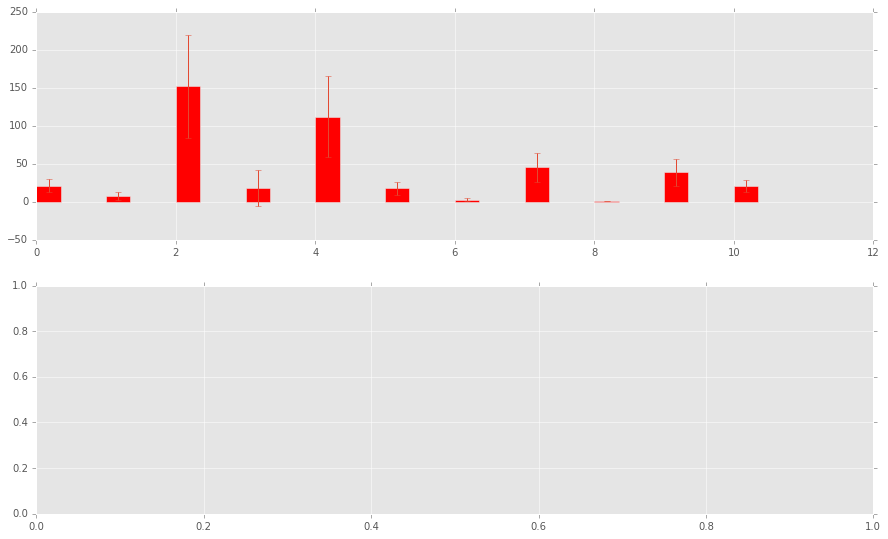

In [42]:
fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(15,9))
ax = axs[0]
df2 = df[df['Activity']=="a1"]
df_copy = df2.copy()
df_copy['Family'] = df2.apply (lambda row: remodel_families (row),axis=1)
df_copy['D'] = 1
width = 0.35

students = get_students("scaffolding",'scaff')
table = pd.pivot_table(df_copy[df_copy['student'].isin(students)], values='D', index=['Family'],columns=['student'], aggfunc=np.sum)
N=len(table.mean(axis=1, skipna=True))
rec1 = ax.bar(np.arange(N), table.mean(axis=1, skipna=True),width,color='r',yerr = table.std(axis=1, skipna=True))

students = get_students("scaffolding",'not')
table = pd.pivot_table(df_copy[df_copy['student'].isin(students)], values='D', index=['Family'],columns=['student'], aggfunc=np.sum)
rec2 = ax.bar(np.arange(N)+width, table.mean(axis=1, skipna=True),width,color='b',yerr = table.std(axis=1, skipna=True))
ax.set_xticks(np.arange(N) + width)
ax.set_xticklabels(table.mean(axis=1, skipna=True).keys())
ax.set_ylabel('Average number of actions per student')
ax.set_title('Average use of actions families in Activity 1')
ax.legend((rec1, rec2), ('Scaffolded', 'Not scaffolded'))
ax.set_ylim([0, 250])

ax = axs[1]
df2 = df[df['Activity']=="a2"]
df_copy = df2.copy()
df_copy['Family'] = df2.apply (lambda row: remodel_families (row),axis=1)
df_copy['D'] = 1
students = get_students("scaffolding",'scaff')
table = pd.pivot_table(df_copy[df_copy['student'].isin(students)], values='D', index=['Family'],columns=['student'], aggfunc=np.sum)
rec1 = ax.bar(np.arange(N), table.mean(axis=1, skipna=True), width, color='r', yerr=table.std(axis=1, skipna=True))
students = get_students("scaffolding",'not')
table = pd.pivot_table(df_copy[df_copy['student'].isin(students)], values='D', index=['Family'],columns=['student'], aggfunc=np.sum)
rec2 = ax.bar(np.arange(N)+width, table.mean(axis=1, skipna=True),width,color='b',yerr = table.std(axis=1, skipna=True))
ax.set_xticks(np.arange(N) + width)
ax.set_xticklabels(table.mean(axis=1, skipna=True).keys())
ax.set_ylabel('Average number of actions per student')
ax.set_title('Average use of action families in Activity 2')
ax.legend((rec1, rec2), ('Scaffolded', 'Not scaffolded'))
ax.set_ylim([0, 250])

(0, 250)

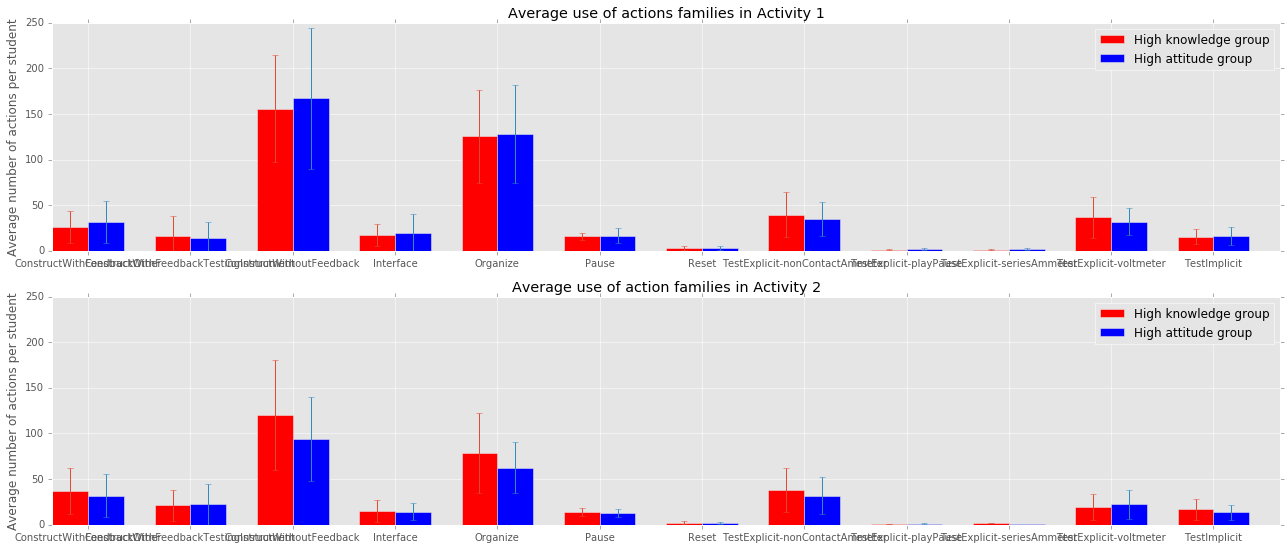

In [41]:
fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(22,9))
ax = axs[0]
df2 = df[df['Activity']=="a1"]
df_copy = df2.copy()
df_copy['Family'] = df2.apply (lambda row: remodel_families (row),axis=1)
df_copy['D'] = 1
width = 0.35

students = get_students("Clustergroups",'knowledge')
table = pd.pivot_table(df_copy[df_copy['student'].isin(students)], values='D', index=['Family'],columns=['student'], aggfunc=np.sum)
N=len(table.mean(axis=1, skipna=True))
rec1 = ax.bar(np.arange(N), table.mean(axis=1, skipna=True),width,color='r',yerr = table.std(axis=1, skipna=True))

students = get_students("Clustergroups",'attitude')
table = pd.pivot_table(df_copy[df_copy['student'].isin(students)], values='D', index=['Family'],columns=['student'], aggfunc=np.sum)
rec2 = ax.bar(np.arange(N)+width, table.mean(axis=1, skipna=True),width,color='b',yerr = table.std(axis=1, skipna=True))
ax.set_xticks(np.arange(N) + width)
ax.set_xticklabels(table.mean(axis=1, skipna=True).keys())
ax.set_ylabel('Average number of actions per student')
ax.set_title('Average use of actions families in Activity 1')
ax.legend((rec1, rec2), ('High knowledge group', 'High attitude group'))
ax.set_ylim([0, 250])

ax = axs[1]
df2 = df[df['Activity']=="a2"]
df_copy = df2.copy()
df_copy['Family'] = df2.apply (lambda row: remodel_families (row),axis=1)
df_copy['D'] = 1
students = get_students("Clustergroups",'attitude')
table = pd.pivot_table(df_copy[df_copy['student'].isin(students)], values='D', index=['Family'],columns=['student'], aggfunc=np.sum)
rec1 = ax.bar(np.arange(N), table.mean(axis=1, skipna=True), width, color='r', yerr=table.std(axis=1, skipna=True))
students = get_students("Clustergroups",'knowledge')
table = pd.pivot_table(df_copy[df_copy['student'].isin(students)], values='D', index=['Family'],columns=['student'], aggfunc=np.sum)
rec2 = ax.bar(np.arange(N)+width, table.mean(axis=1, skipna=True),width,color='b',yerr = table.std(axis=1, skipna=True))
ax.set_xticks(np.arange(N) + width)
ax.set_xticklabels(table.mean(axis=1, skipna=True).keys())
ax.set_ylabel('Average number of actions per student')
ax.set_title('Average use of action families in Activity 2')
ax.legend((rec1, rec2), ('High knowledge group', 'High attitude group'))
ax.set_ylim([0, 250])